<a href="https://colab.research.google.com/github/DeboraOliver/fraud_detection_project/blob/main/Fraude_cartoes_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções gerais

Para que se possa utilizar os códigos contidos nesse colab, é necessário fazer upload do dataset e colocá-lo na mesma altura do código. Na seção "Pré-processamento dos dados" é onde fazemos a leitura do dataset, veja o código e os comentários para entender melhor. Dê preferência para utilizar esses códigos no Goole colab ao invés de rodar localmente.

Esse projeto busca detectar fraudes em cartões de crédito baseado nas seguintes características:
*   **distance_from_home**: Distância entre a casa e o local em que o cartão foi utilizado.
*   **distance_from_last_transaction**: Distância para o último local em que o cartão foi utilizado.
*   **ratio_to_median_purchase_price**: Razão da transação do preço de compra para o preço de compra mediano
*   **repeat_retailer**: É a transação que aconteceu do mesmo varejista.
*   **used_chip**: É a transação através de chip (cartão de crédito).
*   **used_pin_number**: A transação aconteceu usando o número PIN.
*   **online_order**: A transação é um pedido online.

A base de dados é rotulada:
*   **fraud**: A transação é fraudulenta.

Por se tratar de uma base rotulada utilizaremos algoritmos de machine learning de aprendizado supervisionado. 

Mais informações, basta seguir as células abaixo!

# Bibliotecas e pacotes 

Importando as bibliotecas e pacotes necessários

In [40]:
# Arrays e gráficos
import pandas as pd
import numpy as np
import seaborn as sns

# undersampling
from imblearn.under_sampling import TomekLinks

# Preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métricas de avaliação dos modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Pré-processamento dos dados

In [41]:
# Lendo o dataset a partir do arquivo .csv
dataset = pd.read_csv('card_transdata.csv')

# Removendo dados iguais a null
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

# Descrição do dataset
dataset.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000,41242.000000
mean,26.936940,5.115023,1.801843,0.885238,0.351996,0.102323,0.650453,0.087484
std,66.286331,25.057121,2.683173,0.318738,0.477598,0.303076,0.476833,0.282546
min,0.021322,0.000705,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.907375,0.299326,0.475117,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.038226,1.008806,0.995767,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.940708,3.399941,2.076656,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,1872.446884,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
41237,3.220594,3.687526,0.493897,1.0,0.0,1.0,1.0,0.0
41238,19.837844,4.508499,0.617235,1.0,1.0,0.0,1.0,0.0
41239,36.039140,4.455109,0.366383,1.0,1.0,0.0,1.0,0.0
41240,13.191169,0.247942,2.380462,1.0,0.0,1.0,0.0,0.0


## Análise exploratória do dataset

Quantidade de labels fraude: 3608
Quantidade de labels não-fraude: 37634
Porcentagem de labels fraude: {dataset.groupby("fraud").fraud.count().transform(lambda x: (x/x.sum())*100)}


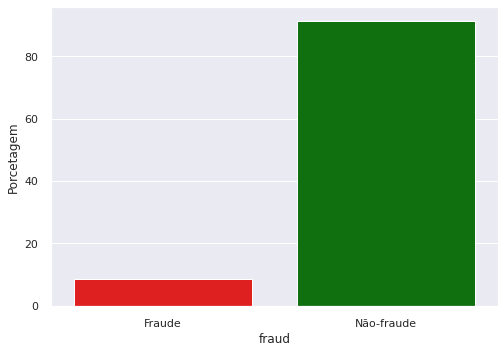

In [43]:
# Balanceamento da base 

# Quantidade de dados com fraude
print(f'Quantidade de labels fraude: {dataset[dataset["fraud"] == 1].fraud.count()}')
print(f'Quantidade de labels não-fraude: {dataset[dataset["fraud"] == 0].fraud.count()}')

# mostrando a PORCENTAGEM de dados com fraude e não-fraude:
#print(f'Porcentagem de labels: {dataset.groupby("fraud").fraud.count().transform(lambda x: (x/x.sum())*100)}')
print('Porcentagem de labels fraude: {dataset.groupby("fraud").fraud.count().transform(lambda x: (x/x.sum())*100)}')

resumo = dataset.groupby(['fraud'])['online_order'].count().transform(lambda x: (x/x.sum())*100).sort_values().rename('Porcetagem').reset_index()
resumo['fraud'] = resumo['fraud'].replace({1.0 : "Fraude", 0.0: "Não-fraude"})

sns.set(style="darkgrid")
sns.barplot(x='fraud',y='Porcetagem',data=resumo, palette=['red','green']);

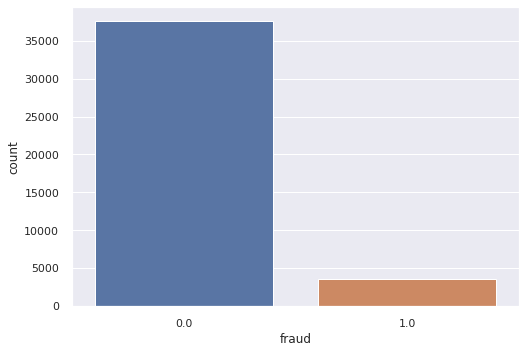

In [44]:
sns.countplot(x = dataset["fraud"]);

# Balanceamento do dataset usando SubAmostragem 

In [45]:
X_caracteristicas_original = dataset.iloc[:,0:7]
Y_classes_original = dataset.iloc[:,7]

tl = TomekLinks(sampling_strategy='all') #auto é o mesmo que "not minority"
X_caracteristicas, Y_classes = tl.fit_resample(X_caracteristicas_original, Y_classes_original) 

X_caracteristicas.shape, Y_classes.shape

((40907, 7), (40907,))

In [60]:
np.unique(Y_classes_original, return_counts=True)

(array([0., 1.]), array([37634,  3608]))

In [46]:
np.unique(Y_classes, return_counts=True)

(array([0., 1.]), array([37299,  3608]))

## Separação dos dados para treino e teste

Nesse caso, iremos utilizar 70% dos dados para treinamento e 30% para teste

In [47]:
# Extraindo do dataset as características (features) e o rótulo de cada linha (fraude = 1 e não-fraude = 0)
# X_caracteristicas = dataset.iloc[:,0:7]
# Y_classes = dataset.iloc[:,7]

# Split do dataset em treino (70%) e teste (30%) 
X_train, X_test, Y_train, Y_test = train_test_split(X_caracteristicas, Y_classes, test_size=0.3, random_state=0)

#pre-processamento
std_scaler = StandardScaler().fit(X_train)
X_train = std_scaler.transform(X_train)
X_test  = std_scaler.transform(X_test)


# Aplicação dos modelos de aprendizado supervisionado
De forma a avaliar diferentes modelos de aprendizado supervisionado, serão testados modelos com os seguintes algoritmos: random forest, naive bayes, SVM e regressão. Os valores de acurácia serão comparados no fim para definir qual a melhor abordagem para esse problema.

## Random Forest


Treinamento do modelo

In [48]:
random_forest_model = RandomForestClassifier(random_state = 500)

random_forest_model.fit(X_train, Y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

Avaliação do modelo

In [49]:
# Acurácia
accuracy_rf = accuracy_score(Y_test, y_pred_random_forest)

# Precisão
precision_rf = precision_score(Y_test, y_pred_random_forest, average='micro')

# Recall
recall_rf  = recall_score(Y_test, y_pred_random_forest, average='micro')

# f1-score
f1_rf = f1_score(Y_test, y_pred_random_forest, average='micro')

print("Acurácia : ", accuracy_rf, "Precisão : ",precision_rf, "Recall : ", recall_rf, "f1-score : ",f1_rf)

Acurácia :  0.999348162633423 Precisão :  0.999348162633423 Recall :  0.999348162633423 f1-score :  0.999348162633423


## Nayve-Bayes 

Treinamento do modelo

In [50]:
classifier = GaussianNB() 

# Treinando o classificador Gaussian Naive Bayes:

classifier.fit(X_train, Y_train)

y_pred_naive_bayes =  classifier.predict(X_test)

Avaliação do modelo

In [51]:
# Acurácia
accuracy_nb = accuracy_score(Y_test, y_pred_naive_bayes)

# Precisão
precision_nb = precision_score(Y_test, y_pred_naive_bayes, average='micro')

# Recall
recall_nb  = recall_score(Y_test, y_pred_naive_bayes, average='micro')

# f1-score
f1_nb = f1_score(Y_test, y_pred_naive_bayes, average='micro')

print("Acurácia : ", accuracy_nb, "Precisão : ",precision_nb, "Recall : ", recall_nb, "f1-score : ",f1_nb)

Acurácia :  0.9502974007985008 Precisão :  0.9502974007985008 Recall :  0.9502974007985008 f1-score :  0.9502974007985008


## SVM

Treinamento do modelo

In [52]:
svm = SVC(kernel='rbf', random_state=1, C = 2.0) 

svm.fit(X_train, Y_train)

y_pred_svm = svm.predict(X_test)

Avaliação do modelo

In [53]:
# Acurácia
accuracy_svm = accuracy_score(Y_test, y_pred_svm)

# Precisão
precision_svm = precision_score(Y_test, y_pred_svm, average='micro')

# Recall
recall_svm  = recall_score(Y_test, y_pred_svm, average='micro')

# f1-score
f1_svm = f1_score(Y_test, y_pred_svm, average='micro')

print("Acurácia : ", accuracy_svm, "Precisão : ", precision_svm, "Recall : ", recall_svm, "f1-score : ",f1_svm)

Acurácia :  0.994948260409028 Precisão :  0.994948260409028 Recall :  0.994948260409028 f1-score :  0.994948260409028


0.994948260409028

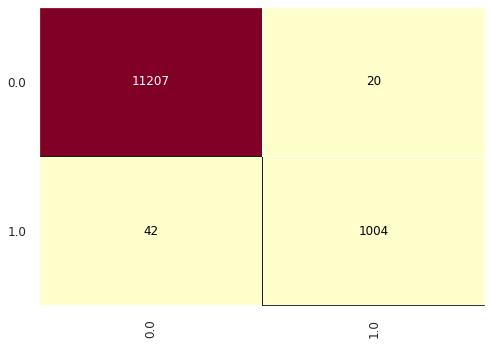

In [54]:
# Work in progress!
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm)
cm.fit(X_train, Y_train)
cm.score(X_test, Y_test)

# Regressão Logística

Treinamento do modelo

In [55]:
regl = LogisticRegression(max_iter=1000, random_state=42)

regl.fit(X_train, Y_train)

y_pred_regressao = regl.predict(X_test)

Avaliação do modelo

In [56]:
# Acurácia
accuracy_regl = accuracy_score(Y_test, y_pred_regressao)

# Precisão
precision_regl = precision_score(Y_test, y_pred_regressao)

# Recall
recall_regl  = recall_score(Y_test, y_pred_regressao)

# f1-score
f1_regl = f1_score(Y_test, y_pred_regressao)

print("Acurácia : ", accuracy_regl, "Precisão : ",precision_regl, "Recall : ", recall_regl, "f1-score : ",f1_regl)

Acurácia :  0.9600749612971563 Precisão :  0.8756756756756757 Recall :  0.6195028680688337 f1-score :  0.7256438969764838


# Avaliação dos modelos

In [57]:
# Work in progress!

### Resumo dos resultados

In [58]:
metrics = {
  "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf],
  "Nayve-Bayes": [accuracy_nb, precision_nb, recall_nb, f1_nb],
  "SVM": [accuracy_svm, precision_svm, recall_svm, f1_svm],
  "Regressão":[accuracy_regl, precision_regl, recall_regl, f1_regl]
}

df = pd.DataFrame(metrics, index = ["Acurácia", "Precisão", "Recall", "f1-score"])

df

,Random Forest,Nayve-Bayes,SVM,Regressão
Acurácia,0.999348,0.950297,0.994948,0.960075
Precisão,0.999348,0.950297,0.994948,0.875676
Recall,0.999348,0.950297,0.994948,0.619503
f1-score,0.999348,0.950297,0.994948,0.725644


# Avaliação dos resultados

In [59]:
# Work in progress!